In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.path.abspath('../Scripts'))
from data_loading import CSVReader
from eda import EDA
from plot import Plot
from preprocessing import FeatureEngineering
from credit_scoring import CreditScoring
from train_model import RiskPredictionModel

In [2]:
# Create an instance of CSVReader
read_csv_data = CSVReader('../data/data.csv')
read_csv_data1 = CSVReader('../data/Xente_Variable_Definitions.csv')

In [3]:
df1 = read_csv_data1.read_csv()
df1

CSV file successfully loaded.


,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [4]:
# Load the CSV file
df = read_csv_data.read_csv()

CSV file successfully loaded.


In [15]:
df.ProductId.value_counts()

ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: count, dtype: int64

In [5]:
# Print the first few rows
read_csv_data.get_head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
# Print the shape of the data
print("Shape of the dataset:", read_csv_data.get_shape())

Shape of the dataset: (95662, 16)


In [5]:
# Print the column names
print("Columns:", read_csv_data.get_columns())

Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']


## Task 2: - Exploratory Data Analysis (EDA)

In [5]:
# Create an instance of the EDA class
eda = EDA(df)
plot = Plot(df)

### **Overview of the Data**

In [7]:
# Perform EDA
eda.overview()

Dataset Overview:
Number of rows: 95662
Number of columns: 16

Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


### **Summary Statistics**

In [9]:
eda.summary_statistics()


Summary Statistics:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [11]:
# Select only object-type (categorical) columns
object_columns = df.select_dtypes(include='object')
object_columns

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2018-11-15T02:18:49Z
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T02:19:08Z
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3,2018-11-15T02:44:21Z
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,2018-11-15T03:32:55Z
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T03:34:21Z
...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2019-02-13T09:54:09Z
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2019-02-13T09:54:25Z
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2019-02-13T09:54:35Z
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,ProviderId_6,ProductId_19,tv,ChannelId_3,2019-02-13T10:01:10Z


In [12]:
# Calculate distribution statistics for each column
for column in object_columns:
    print(f"Statistics for column: {column}")
    print("Frequency:\n", df[column].value_counts())
    print("\nProportion:\n", df[column].value_counts(normalize=True))
    print("\nNumber of unique categories:", df[column].nunique())
    print("Most frequent category:", df[column].mode()[0])
    print("-" * 40)

Statistics for column: TransactionId
Frequency:
 TransactionId
TransactionId_35670     1
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
                       ..
TransactionId_64044     1
TransactionId_98367     1
TransactionId_122975    1
TransactionId_118831    1
TransactionId_86903     1
Name: count, Length: 95662, dtype: int64

Proportion:
 TransactionId
TransactionId_35670     0.00001
TransactionId_76871     0.00001
TransactionId_73770     0.00001
TransactionId_26203     0.00001
TransactionId_380       0.00001
                         ...   
TransactionId_64044     0.00001
TransactionId_98367     0.00001
TransactionId_122975    0.00001
TransactionId_118831    0.00001
TransactionId_86903     0.00001
Name: proportion, Length: 95662, dtype: float64

Number of unique categories: 95662
Most frequent category: TransactionId_1
----------------------------------------
Statistics for column: BatchId
Frequency:
 BatchId
BatchId_67019 

### **Distribution of Numerical Features**


Distribution of Numerical Features:


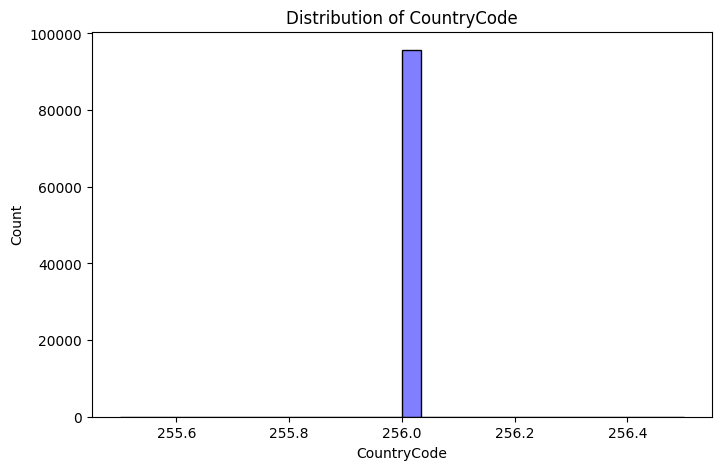

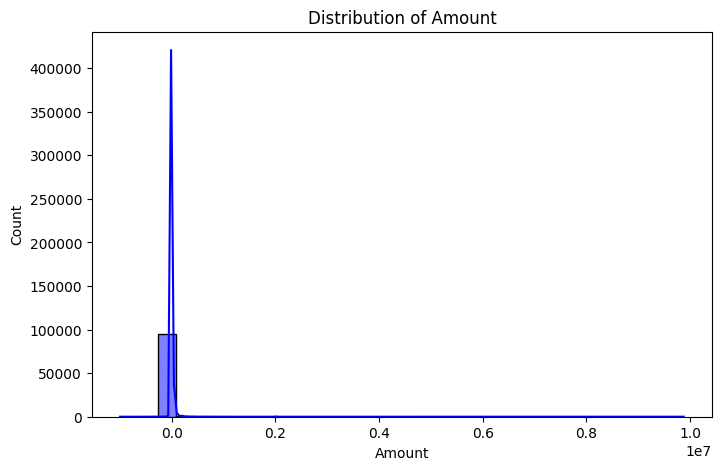

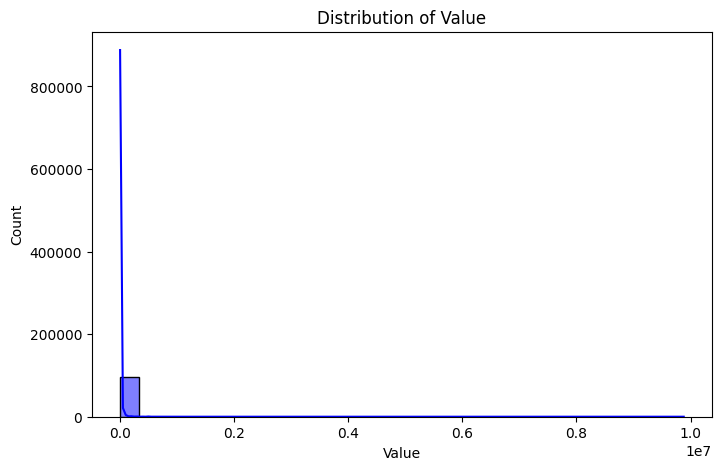

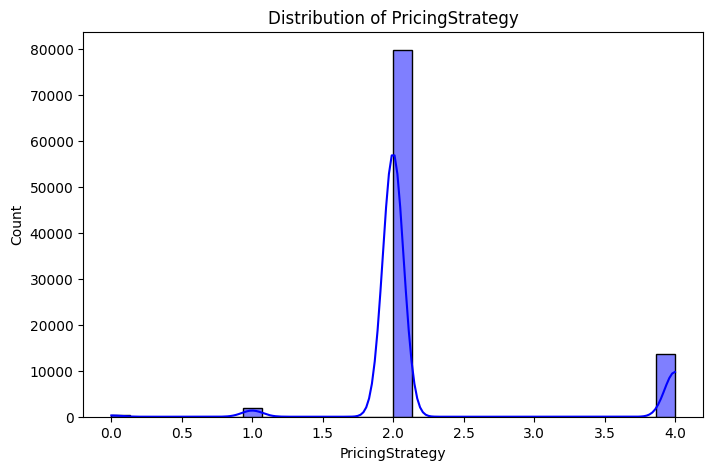

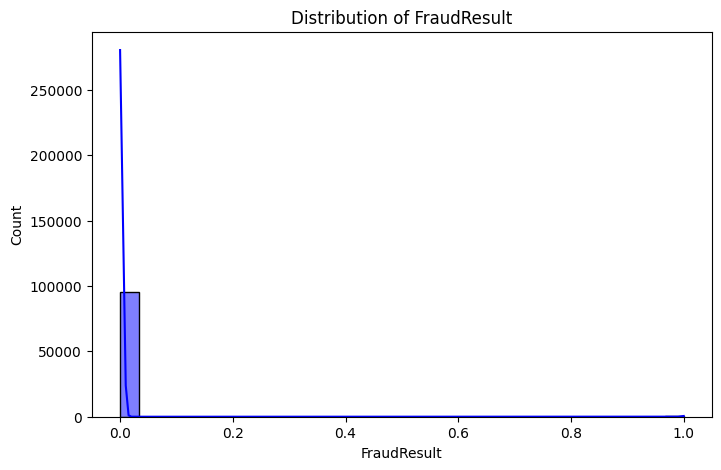

In [11]:
plot.distribution_numerical_features()

### **Distribution of Categorical Features**


Distribution of Categorical Features:


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


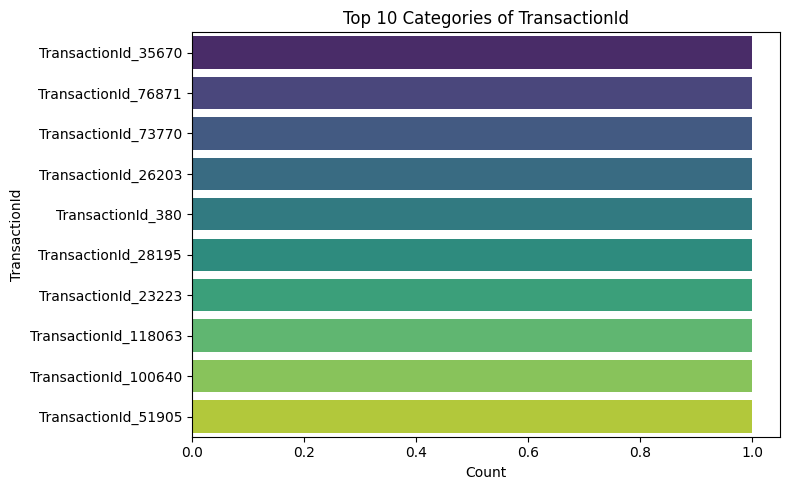

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


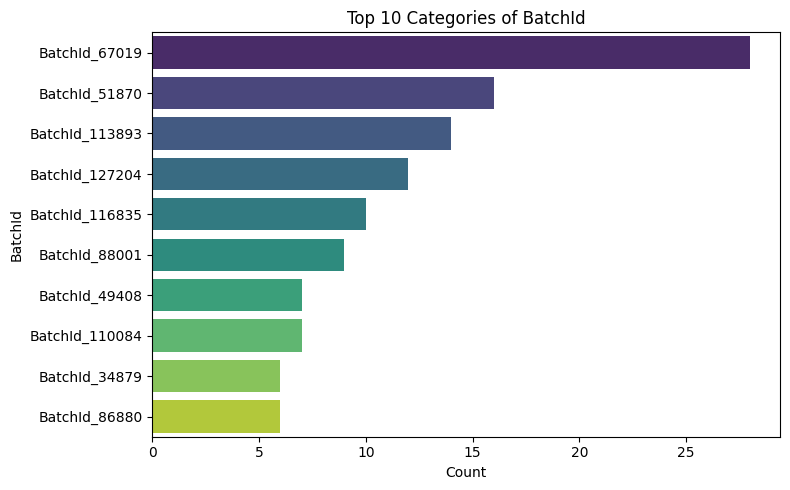

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


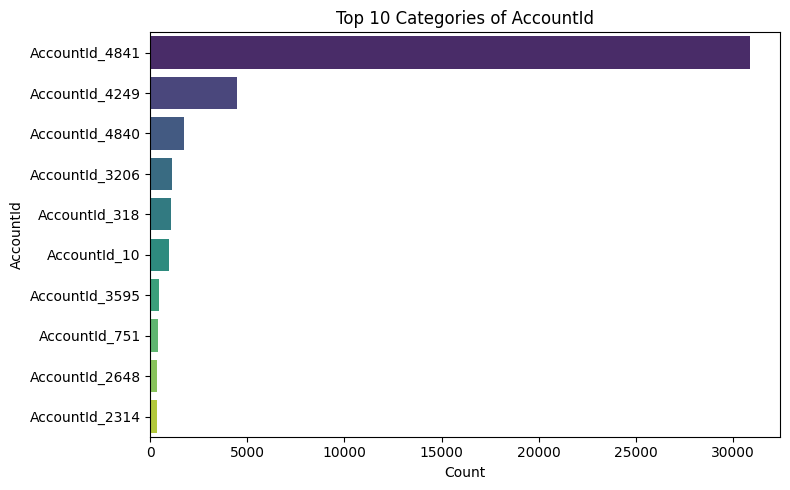

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


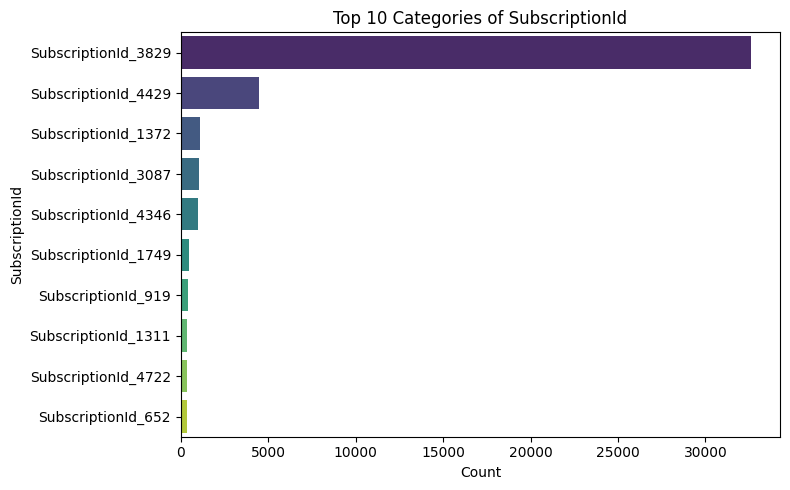

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


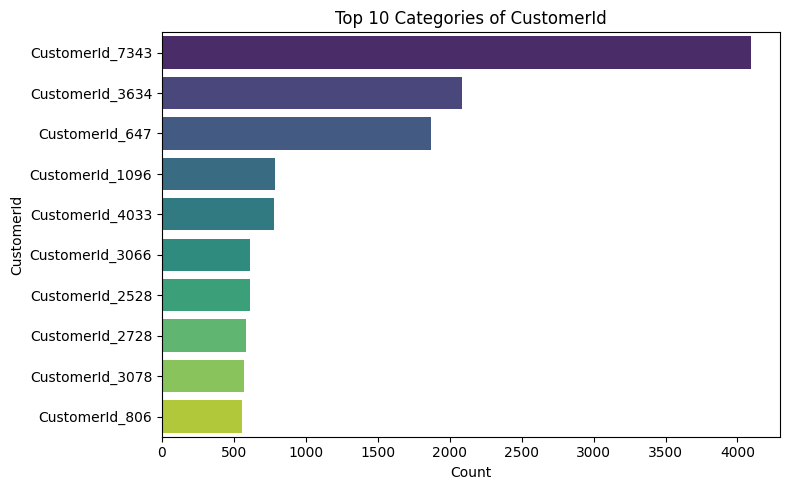

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


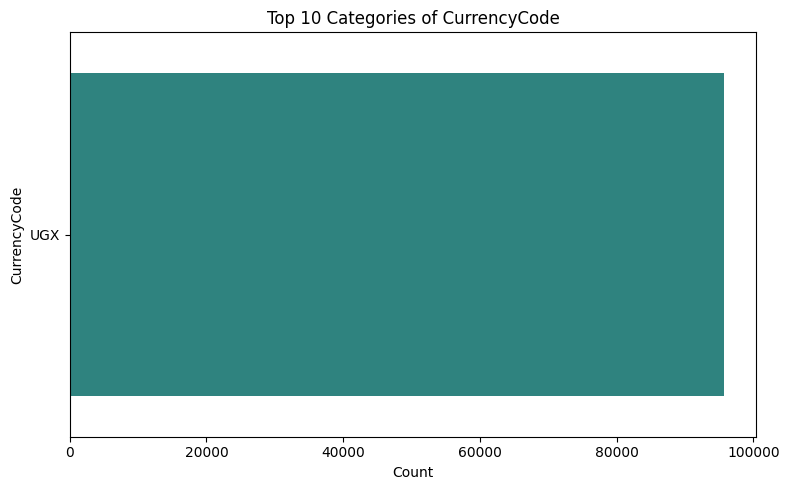

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


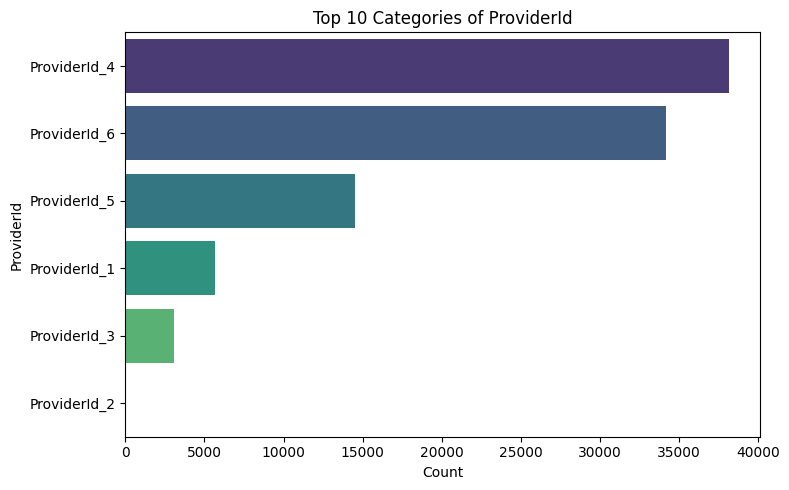

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


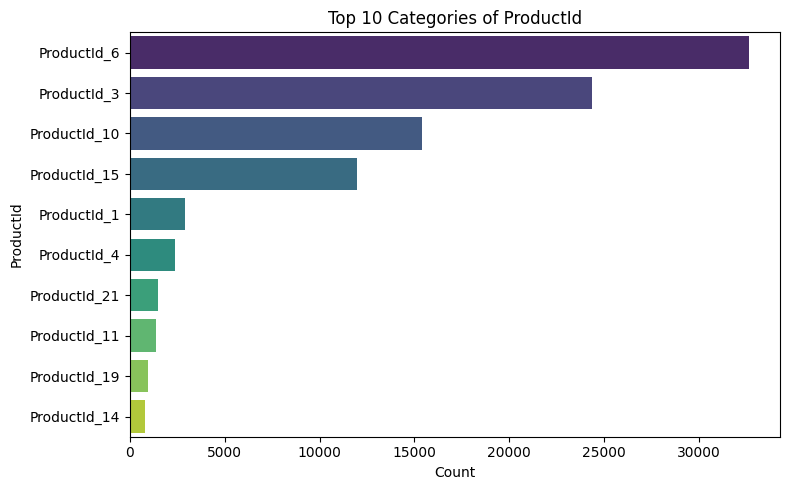

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


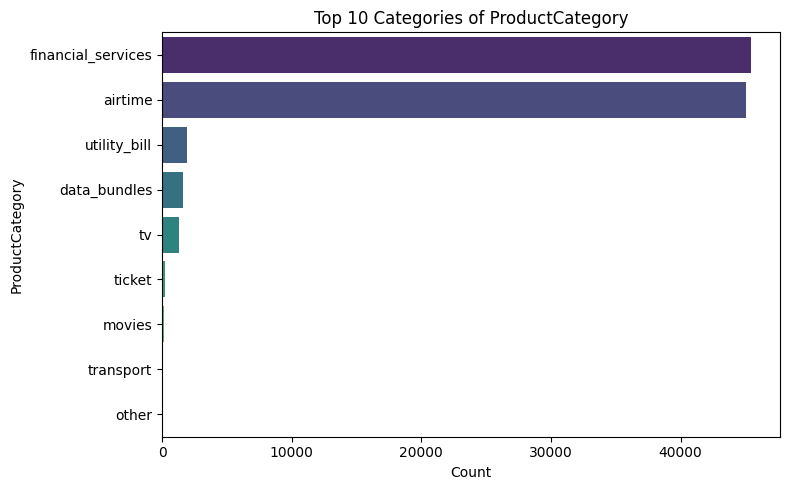

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


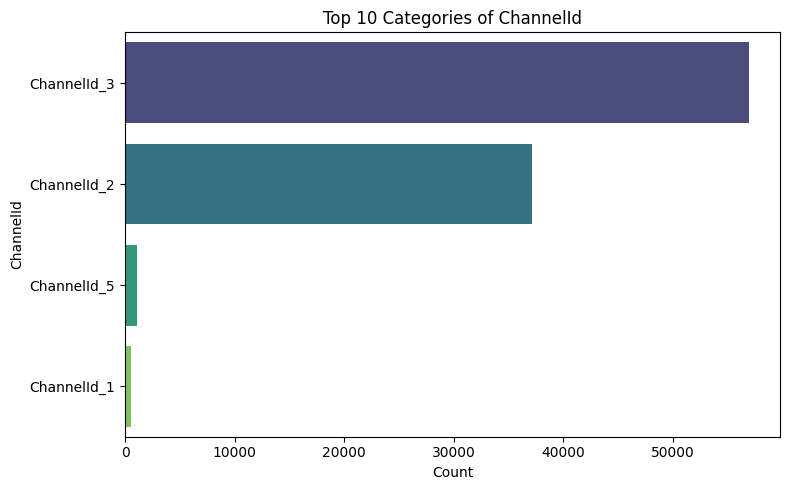

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\plot.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


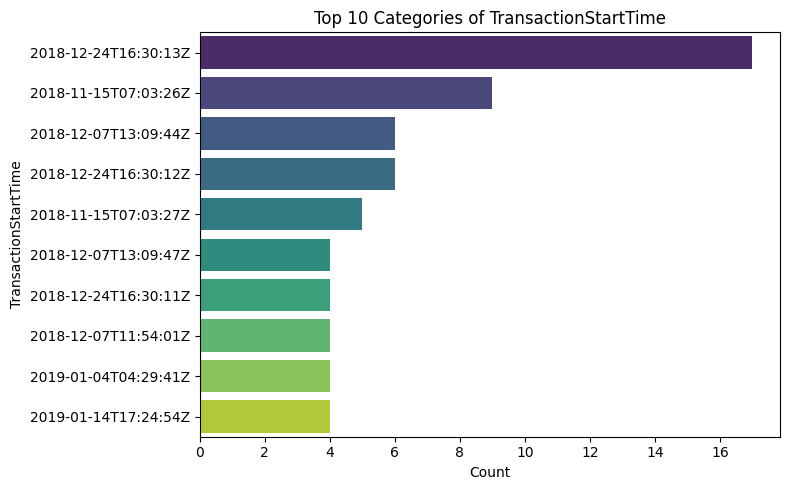

In [24]:
# plot.distribution_categorical_features()
plot.distribution_categorical_features(top_n=10)

In [6]:
df = df.drop(columns=['CountryCode','CurrencyCode', 'BatchId','Value'])

### **Correlation Analysis**


Correlation Analysis:


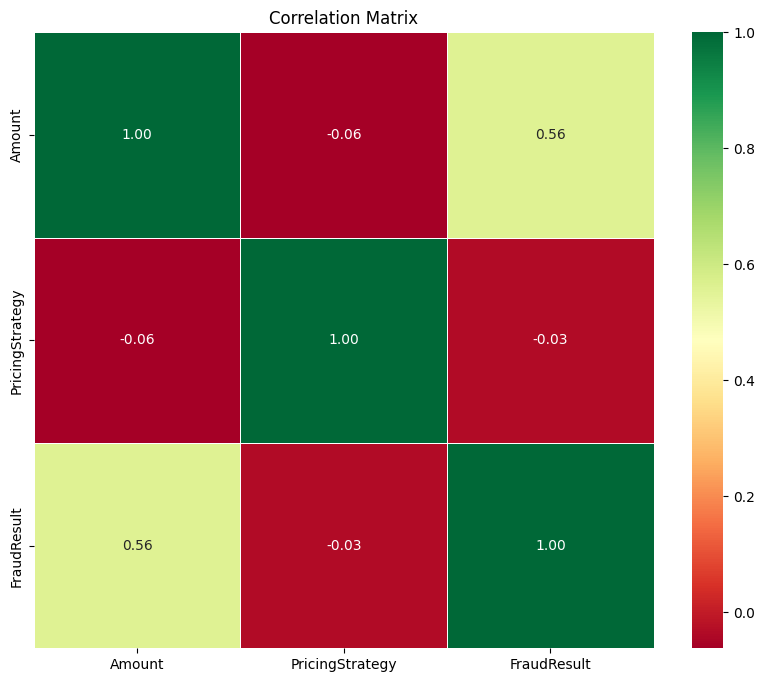

In [111]:
plot.correlation_analysis(df)

### **Identifying Missing Values**

In [141]:
eda.identify_missing_values(df)


Missing Values:
Series([], dtype: int64)


### **Outlier Detection**


Outlier Detection:


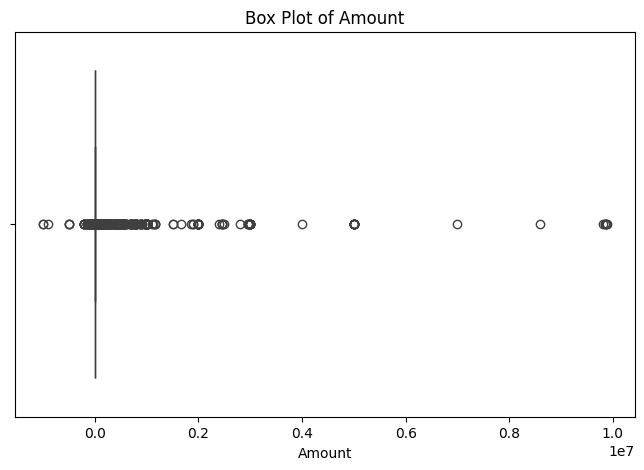

Feature: Amount
Outliers Detected:
[20000. 10000. 10000. ... 15000. 15000. 50000.]


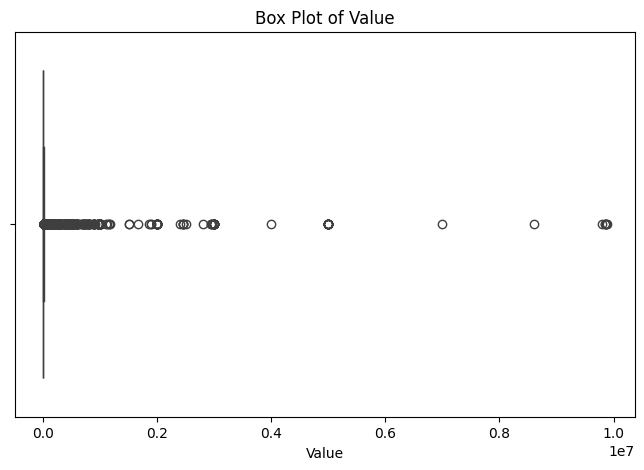

Feature: Value
Outliers Detected:
[21800 30000 41000 ... 15000 15000 50000]


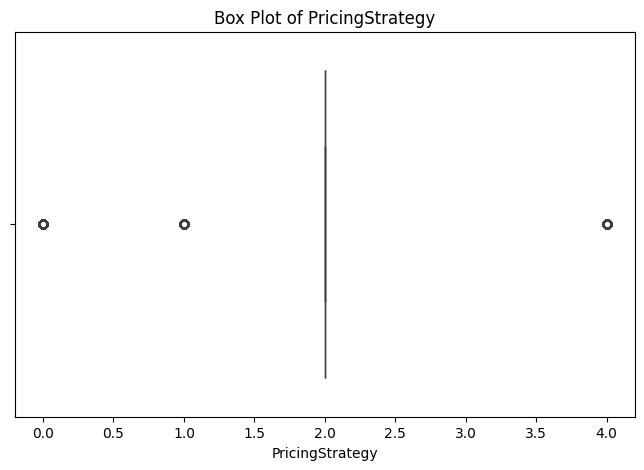

Feature: PricingStrategy
Outliers Detected:
[4 4 4 ... 4 4 1]


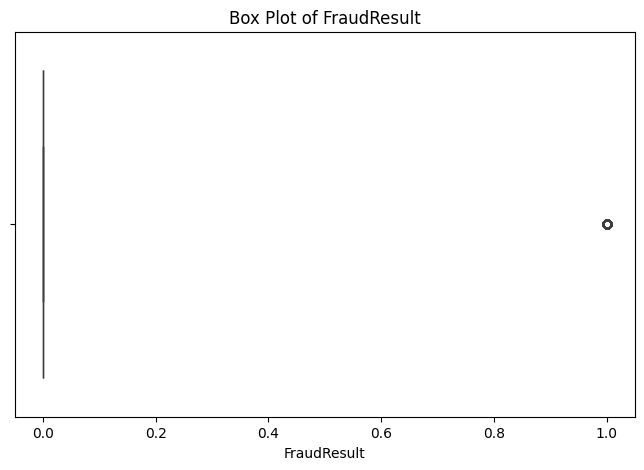

Feature: FraudResult
Outliers Detected:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [19]:
plot.detect_outliers(df)

In [25]:
df.PricingStrategy.value_counts()

PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64

## Task 3 - Feature Engineering

In [7]:
fe = FeatureEngineering(df)

### **1. Create Aggregate Features**

In [8]:
df = fe.create_aggregate_features(df,)

### **2. Extract Features**

In [9]:
df = fe.extract_datetime_features(df,)

In [166]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


### **3. Encode Categorical Variables**

In [10]:
df = fe.encode_categorical_variables(df,method='onehot')

In [69]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
len(df.columns)

54

### **4. Handle Missing Values**

In [12]:
df = fe.handle_missing_values(df,method='imputation')

In [72]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2.0,0.0,109921.75,923.712185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2.0,0.0,109921.75,923.712185,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2.0,0.0,1000.00,500.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2.0,0.0,228727.20,6019.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2.0,0.0,228727.20,6019.136842,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### **5. Normalize/Standardize Numerical Features**

In [13]:
df = fe.normalize_or_standardize(df,method='standardize')

In [19]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,-0.046371,2018-11-15 02:18:49+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-0.054643,2018-11-15 02:19:08+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,-0.050426,2018-11-15 02:44:21+00:00,-0.349252,-0.044962,0.165122,-0.072568,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,0.107717,2018-11-15 03:32:55+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,6.987414,-0.796656,0.824740,-0.105245
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-0.059704,2018-11-15 03:34:21+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245


## Task 4 - Default estimator and WoE binning 

### Initialize the CreditScoring class

In [14]:
# Initialize the CreditScoring class
cs = CreditScoring(df)

### Calculate RFMS scores

In [15]:
# Calculate RFMS scores
rfms_scores = cs.calculate_rfms_score(df)

In [16]:
df = rfms_scores

In [16]:
rfms_scores.sort_values(by = 'No_Subscription', ascending=False)

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score
51991,TransactionId_16549,AccountId_2314,SubscriptionId_4722,CustomerId_2728,-0.046371,2019-01-07 06:41:43+00:00,-0.349252,-0.044962,0.222454,-0.053489,...,-0.143114,-0.796656,0.824740,-0.105245,38,586,-0.046371,3,3,156.738407
67605,TransactionId_130497,AccountId_4841,SubscriptionId_3829,CustomerId_2710,-0.054887,2019-01-22 04:13:07+00:00,-0.349252,-0.044962,0.195811,-0.033456,...,-0.143114,1.255247,-1.212503,-0.105245,23,174,-0.054887,3,3,49.986278
79073,TransactionId_121064,AccountId_4841,SubscriptionId_3829,CustomerId_1096,-0.054643,2019-01-31 10:10:47+00:00,-0.349252,-0.044962,0.254480,-0.049387,...,-0.143114,1.255247,-1.212503,-0.105245,13,784,-0.054643,3,4,199.986339
79294,TransactionId_74317,AccountId_4841,SubscriptionId_3829,CustomerId_1096,-0.054643,2019-01-31 13:31:31+00:00,-0.349252,-0.044962,0.254480,-0.049387,...,-0.143114,1.255247,-1.212503,-0.105245,13,784,-0.054643,3,4,199.986339
37011,TransactionId_33597,AccountId_4841,SubscriptionId_3829,CustomerId_4873,-0.055292,2018-12-22 12:31:50+00:00,-0.349252,-0.044962,0.205220,-0.025750,...,-0.143114,1.255247,-1.212503,-0.105245,53,194,-0.055292,3,3,62.486177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95270,TransactionId_130539,AccountId_596,SubscriptionId_4336,CustomerId_934,0.067167,2019-02-12 21:35:40+00:00,-0.349252,-0.044962,0.166223,0.067483,...,-0.143114,-0.796656,0.824740,-0.105245,1,2,0.067167,1,1,1.016792
93589,TransactionId_4818,AccountId_2420,SubscriptionId_4836,CustomerId_7457,-0.865471,2019-02-11 13:03:06+00:00,2.379557,-0.044962,0.155903,-1.245495,...,-0.143114,1.255247,-1.212503,-0.105245,2,2,-0.865471,1,1,1.033632
95155,TransactionId_57056,AccountId_2083,SubscriptionId_2836,CustomerId_2488,0.269915,2019-02-12 18:49:17+00:00,-0.349252,-0.044962,0.168746,0.388433,...,-0.143114,-0.796656,0.824740,-0.105245,1,2,0.269915,1,1,1.067479
10792,TransactionId_69165,AccountId_4249,SubscriptionId_4429,CustomerId_7343,-0.297778,2018-11-29 15:12:22+00:00,2.379557,-0.044962,-4.646278,-0.377665,...,-0.143114,1.255247,-1.212503,-0.105245,76,4091,-0.297778,1,1,1041.925556


In [153]:
df['RFMS_Score'].median()

np.float64(36.236278368340315)

###  Classify users into good/bad

In [17]:
#  Classify users into good/bad
threshold = 110  # threshold
threshold = df['RFMS_Score'].median()
classified_users = cs.classify_good_bad(df,threshold)

0.5808849721686311 109.46724143338001 1045.1856928957998


### Perform WoE binning

In [18]:
# Perform WoE binning
df, woe_results = cs.perform_woe_binning(classified_users, variable='Amount')

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\credit_scoring.py:111: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  woe_df = pd.concat([woe_df, new_row], ignore_index=True)


In [19]:
woe_results

,Bin,Good,Bad,Total,Good%_Bin,Bad%_Bin,WoE
0,0.0,8282,8883,17165,0.482493,0.517507,-0.070055
1,3.0,16394,13418,29812,0.549913,0.450087,0.200318
2,1.0,13095,7994,21089,0.620940,0.379060,0.493539
3,4.0,6805,14011,20816,0.326912,0.673088,-0.722185
4,2.0,3286,3494,6780,0.484661,0.515339,-0.061376


In [19]:
df.Risk.value_counts()

Risk
good    47862
bad     47800
Name: count, dtype: int64

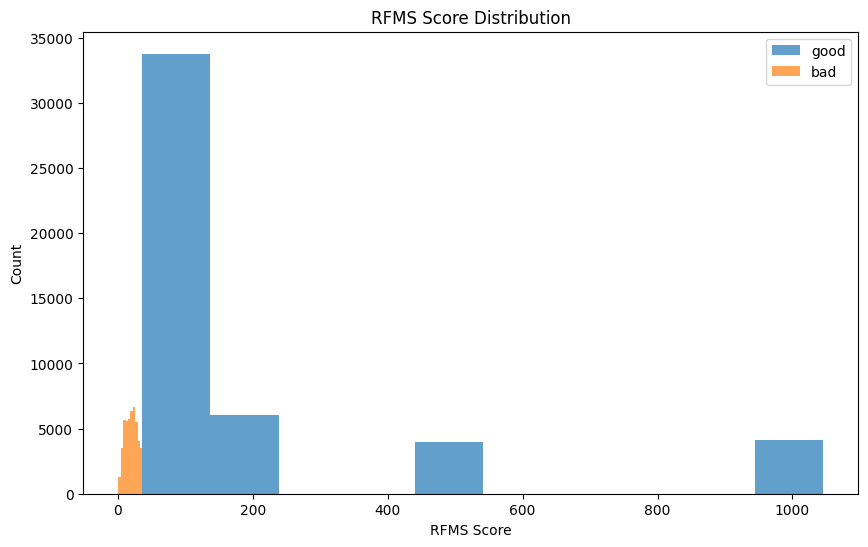

In [180]:
# Visualize RFMS distribution
plot.plot_rfms_distribution(df)

## Task 4 - Modelling

#### Split the Data

In [20]:
df1 = df

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95662 entries, 1517 to 93643
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   AccountId                           95662 non-null  object             
 2   SubscriptionId                      95662 non-null  object             
 3   CustomerId                          95662 non-null  object             
 4   Amount                              95662 non-null  float64            
 5   TransactionStartTime                95662 non-null  datetime64[ns, UTC]
 6   PricingStrategy                     95662 non-null  float64            
 7   FraudResult                         95662 non-null  float64            
 8   TotalTransactionAmount              95662 non-null  float64            
 9   AvgTransactionAmount                95662

In [28]:
df = df1

In [29]:
models = RiskPredictionModel(df)

In [30]:

models.preprocess_data()

In [33]:
df.columns

Index(['TransactionId', 'AccountId', 'SubscriptionId', 'CustomerId', 'Amount',
       'PricingStrategy', 'FraudResult', 'TotalTransactionAmount',
       'AvgTransactionAmount', 'TransactionCount', 'StdTransactionAmount',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_Pr

In [25]:
models.split_data()

#### Train the Models

#### Logistic Regression

In [32]:
models.train_logistic_regression()

LogisticRegression(max_iter=1000, random_state=42)

#### Random Forest

In [34]:
models.train_random_forest()

RandomForestClassifier(random_state=42)

### **Hyperparameter Tuning**

#### Grid Search

In [35]:
models.grid_search_train_random_forest()

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

#### Randomized Search

In [36]:
models.random_forest_randomized_search()

c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

#### Model Evaluation

In [37]:
models.evaluate_models()

Logistic Regression:
Accuracy: 0.9955051481733131
Precision: 0.9954046997389034
Recall: 0.9956126606079598
F1 Score: 0.995508669312722
ROC-AUC: 0.9998962825624894

Random Forest:
Accuracy: 0.9999477342810851
Precision: 0.999895550449133
Recall: 1.0
F1 Score: 0.999947772496997
ROC-AUC: 1.0

Random Forest:
Accuracy: 0.9999477342810851
Precision: 0.999895550449133
Recall: 1.0
F1 Score: 0.999947772496997
ROC-AUC: 0.9999999781463469

Random Forest:
Accuracy: 0.9999477342810851
Precision: 0.999895550449133
Recall: 1.0
F1 Score: 0.999947772496997
ROC-AUC: 0.9999999781463469


(array([1, 0, 1, ..., 1, 1, 1]),
 array([1, 0, 1, ..., 1, 1, 1]),
 array([1, 0, 1, ..., 1, 1, 1]),
 array([1, 0, 1, ..., 1, 1, 1]))

#### Selected Model Training

In [38]:
models.selected_model_train_random_forest()

In [45]:
import os

# Create the directory if it doesn't exist
model_dir = '../CreditRiskPredictionAPI/Model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [46]:
models.save_model()  # Save the model to file

In [41]:
models.summarize_model()  # Summarize the model

Model Parameters:
Number of Trees: 50
Max Depth: 10

Feature Importances:
TransactionId: 0.00019698169847608967
AccountId: 0.0010048630101145027
SubscriptionId: 0.000994166365839699
CustomerId: 0.004603575106064494
Amount: 0.007431449471901185
PricingStrategy: 0.00019159281235451046
FraudResult: 1.451115760786015e-05
TotalTransactionAmount: 0.08365495283781019
AvgTransactionAmount: 0.014599884106088598
TransactionCount: 0.23896226390740508
StdTransactionAmount: 0.013172267989152033
TransactionHour: 0.0005700387893896823
TransactionDay: 0.0012343992811587518
TransactionMonth: 0.008677236899673818
TransactionYear: 0.008368184203207715
ProviderId_ProviderId_2: 0.0
ProviderId_ProviderId_3: 0.00022695258339193317
ProviderId_ProviderId_4: 0.0003969227577345964
ProviderId_ProviderId_5: 0.0015336171500889195
ProviderId_ProviderId_6: 0.0005769122692695181
ProductId_ProductId_10: 0.0003604072763772523
ProductId_ProductId_11: 1.0935348861172847e-05
ProductId_ProductId_12: 0.0
ProductId_ProductId_

Visualizing Model Hyperparameters:


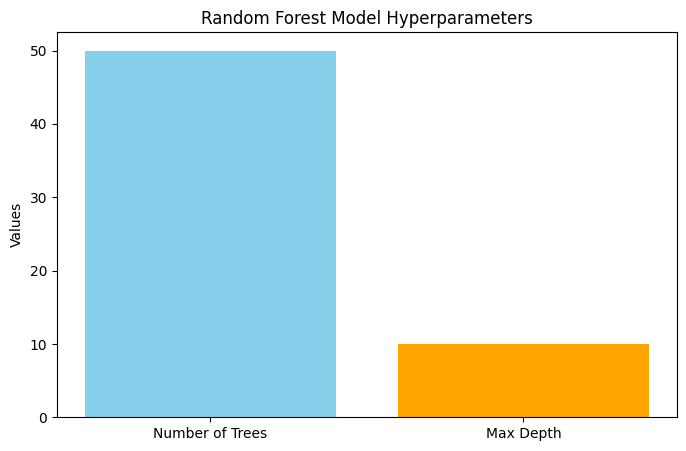

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_6\Scripts\train_model.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



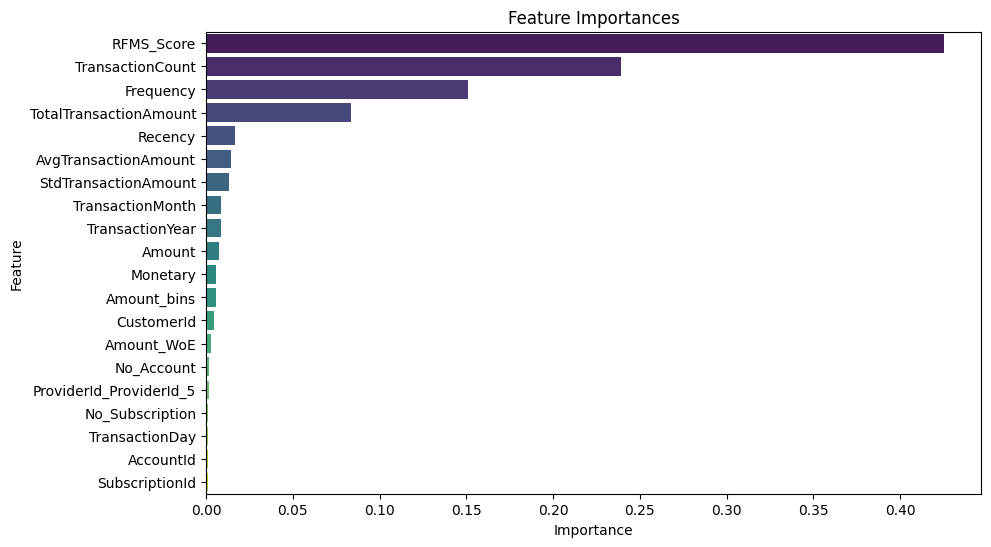

In [50]:
models.visualize_model()  # Visualize the model

In [42]:
models.evaluation_of_selected_model()  # Evaluate the model

Random Forest Model Evaluation:
Accuracy: 0.9999477342810851
Precision: 0.999895550449133
Recall: 1.0
F1 Score: 0.999947772496997
ROC-AUC: 0.9999999781463469


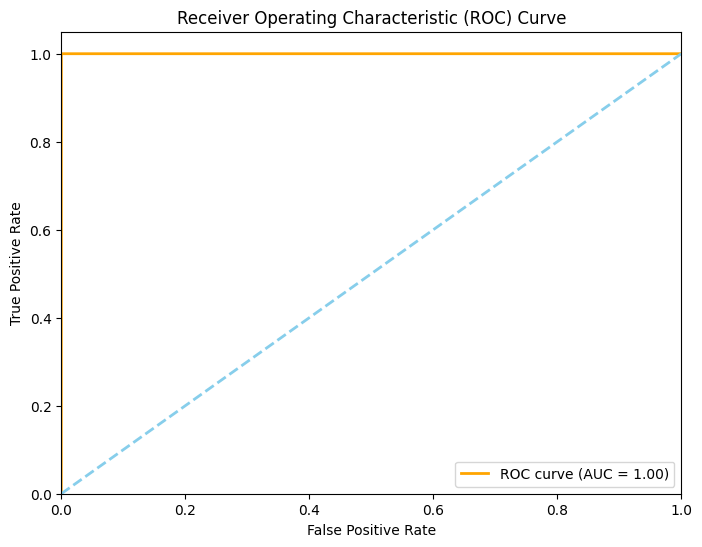

In [59]:
# Visualize ROC-AUC curve
models.roc_auc_curve()

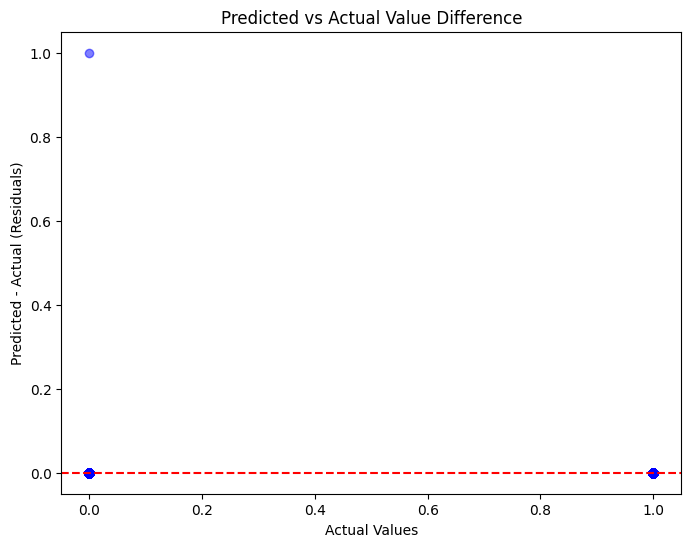

In [52]:
# Visualize Predicted vs Actual Value Difference
models.predicted_vs_actual_diff()